# 1. 问题陈述
在线性回归问题中，你可以得到很多的数据点，然后你需要使用一条直线去拟合这些离散点。在这个例子中，我们创建了100个离散点，然后用一条直线去拟合它们。

# 2. 创建训练数据
TrainX 的数据范围是 -1 到 1，TrainY 与 TrainX 的关系是3倍，并且我们加入了一些噪声点。

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import os

w = 3
b = 1.25
sigma = 0.5
trX = np.linspace(-1, 1, 101)
trY = w*trX + b + np.random.randn(*trX.shape) * sigma

Using TensorFlow backend.


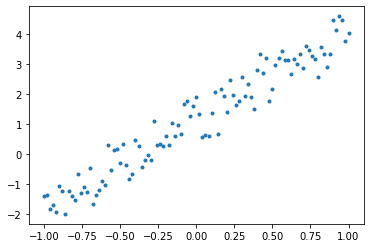

In [2]:
plt.plot(trX, trY, '.')

# 3. 构建模型
首先我们需要构建一个序列模型。我们需要的只是一个简单的链接，因此我们只需要使用一个 Dense 层就够了，然后用线性函数进行激活。

In [3]:
model = Sequential()
# model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))
model.add(Dense(input_dim=1, units=1, kernel_initializer='uniform', activation='linear'))

下面的代码将设置输入数据 x，权重 w 和偏置项 b。然我们来看看具体的初始化工作。如下：

In [16]:
if os.path.exists('my_model_weights.h5'):
    model.load_weights('my_model_weights.h5')
else:
    weights = model.layers[0].get_weights()

w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weights w: %.2f, b: %.2f' % (w_init, b_init)) 
## Linear regression model is initialized with weight w: -0.03, b: 0.00

Linear regression model is initialized with weights w: 1.95, b: 1.10


现在，我们可以l利用自己构造的数据 trX 和 trY 来训练这个线性模型，其中 trY 是 trX 的3倍。因此，权重 w 的值应该是 3。我们使用简单的梯度下降来作为优化器，均方误差（MSE）作为损失值。如下：

In [17]:
model.compile(optimizer='sgd', loss='mse')

最后，我们使用 fit 函数来输入数据。

In [18]:
model.fit(trX, trY, epochs=20, verbose=1)

Epoch 1/20
101/101 [==============================] - 0s 355us/step - loss: 0.5725
Epoch 2/20
101/101 [==============================] - 0s 89us/step - loss: 0.5520
Epoch 3/20
101/101 [==============================] - 0s 79us/step - loss: 0.5304
Epoch 4/20
101/101 [==============================] - 0s 109us/step - loss: 0.5148
Epoch 5/20
101/101 [==============================] - 0s 89us/step - loss: 0.4987
Epoch 6/20
101/101 [==============================] - 0s 89us/step - loss: 0.4854
Epoch 7/20
101/101 [==============================] - 0s 109us/step - loss: 0.4705
Epoch 8/20
101/101 [==============================] - 0s 99us/step - loss: 0.4577
Epoch 9/20
101/101 [==============================] - 0s 89us/step - loss: 0.4454
Epoch 10/20
101/101 [==============================] - 0s 89us/step - loss: 0.4328
Epoch 11/20
101/101 [==============================] - 0s 89us/step - loss: 0.4185
Epoch 12/20
101/101 [==============================] - 0s 89us/step - loss: 0.4083
Epoch 13/2

注：与线性回归进行对比，可以看出线性回归的优点：有显式公式，不用训练。

在经过训练之后，我们再次打印权重：

In [19]:
weights = model.layers[0].get_weights()
w_final = weights[0][0][0]
b_final = weights[1][0]
print('Linear regression model is trained to have weight w: %.2f, b: %.2f' % (w_final, b_final))
##Linear regression model is trained to have weight w: 2.94, b: 0.08

Linear regression model is trained to have weight w: 2.38, b: 1.14


正如你所看到的，在运行 200 轮之后，现在权重非常接近于 3。你可以将运行的轮数修改为区间 [100, 300] 之间，然后观察输出结构有什么变化。现在，你已经学会了利用很少的代码来构建一个线性回归模型，如果要构建一个相同的模型，在 TensorFlow 中需要用到更多的代码。

In [20]:
model.save_weights("my_model_weights.h5")